In [1]:
import pandas as pd
import numpy as np
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('...'))))

from src.ingest_data import DataIngestorFactory
from analysis.analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analysis.analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analysis.analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analysis.analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analysis.analyze_src.multivariate_analysis import SimpleMultivariateAnalysis



# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [2]:
# Specify the file path
file_path = "/Users/kishenkumarsivalingam/Documents/MLE/data.zip"

# Determine the file extension
file_extension = os.path.splitext(file_path)[1]

# Get the appropriate DataIngestor
data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)

# Ingest the data and load it into a DataFrame
df = data_ingestor.ingest(file_path)

# Now df contains the DataFrame from the extracted CSV
df.head()  # Display the first few rows of the DataFrame

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [3]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577682 entries, 0 to 577681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            577426 non-null  object 
 1   anon_ssn                          577682 non-null  object 
 2   payFrequency                      576409 non-null  object 
 3   apr                               573760 non-null  float64
 4   applicationDate                   577682 non-null  object 
 5   originated                        577682 non-null  bool   
 6   originatedDate                    46044 non-null   object 
 7   nPaidOff                          577658 non-null  float64
 8   approved                          577682 non-null  bool   
 9   isFunded                          577682 non-null  int64  
 10  loanStatus                        577291 non-null  object 
 11  loanAmount         

In [4]:
# Switch strategy to Summary Statistics Inspection
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
                 apr       nPaidOff       isFunded     loanAmount  \
count  573760.000000  577658.000000  577682.000000  575432.000000   
mean      553.080972       0.037887       0.067480     514.245084   
std       110.046159       0.333366       0.250852     320.939929   
min         0.000000       0.000000       0.000000       0.000000   
25%       490.000000       0.000000       0.000000     350.000000   
50%       590.000000       0.000000       0.000000     500.000000   
75%       601.000000       0.000000       0.000000     500.000000   
max       705.590000      21.000000       1.000000    5000.000000   

       originallyScheduledPaymentAmount       leadCost          hasCF  
count                     577682.000000  577682.000000  577682.000000  
mean                        1428.897209       7.854389       0.619187  
std                          925.009141      12.853451       0.485587  
min                         -816.710000       0.


Missing Values Count by Column:
loanId               256
payFrequency        1273
apr                 3922
originatedDate    531638
nPaidOff              24
loanStatus           391
loanAmount          2250
state                132
fpStatus          525959
clarityFraudId    219989
dtype: int64

Visualizing Missing Values...


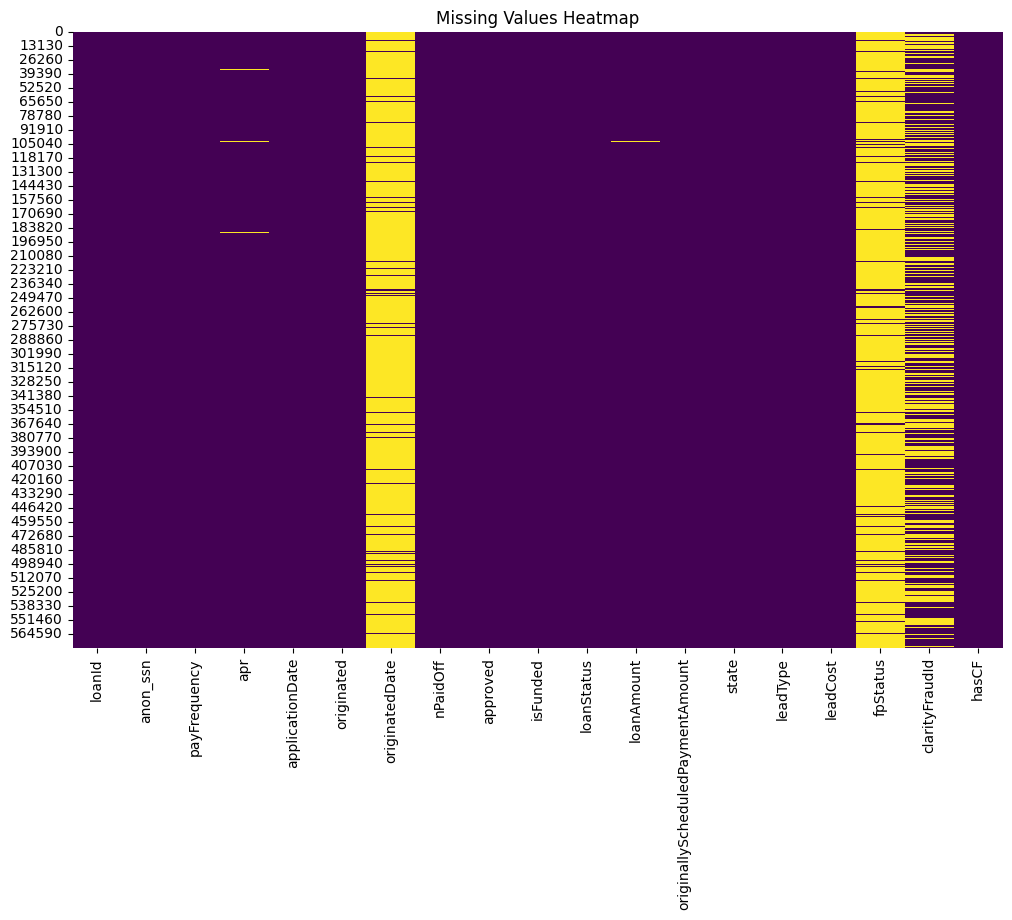

In [5]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

## **Missing Values Heatmap Insights**

### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow in a column, the higher the proportion of missing data.  
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple have most of their data intact.  

### **2. Identifying Columns with Missing Data:**
- **Columns with significant missing values:**  
  - `originatedDate` (**92.99% missing**) - This column has the highest proportion of missing data, likely because it is only applicable for loans that were successfully originated.  
  - `fpStatus` (**91.05% missing**) - A substantial number of missing values suggest that this feature might not be applicable for most loans.  
  - `clarityFraudId` (**38.09% missing**) - Missing fraud IDs might indicate that not all applications undergo the same fraud check process.  

- **Columns with moderate missing values:**  
  - `loanId` (**0.04% missing**) - A small number of missing values, but since it is a unique identifier, missing data here could indicate data integrity issues.  
  - `payFrequency` (**0.22% missing**) - Could indicate some applicants did not specify a pay frequency or it was not recorded.  
  - `apr` (**0.68% missing**) - A small percentage of missing APR values could mean incomplete applications.  
  - `loanAmount` (**0.39% missing**) - Missing values could be due to applications not reaching the loan amount assignment stage.  
  - `state` (**0.02% missing**) - A negligible number of missing values, possibly due to incomplete applications.  
  - `loanStatus` (**0.07% missing**) - This should ideally not be missing, as it is a key indicator of loan performance.  

### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed:** If missing values appear scattered without any clear pattern, they may be due to data entry issues.  
- **Structured Missingness:** Some missing values are likely structured (e.g., `originatedDate` is only present for originated loans, and `clarityFraudId` may only apply to certain applicants).  

### **4. Assessing the Severity:**
- **`originatedDate` and `fpStatus`** - These columns have over **90% missing data**, making them potentially unreliable for predictive modeling.  
- **Columns with <1% missing values** - `loanAmount`, `state`, and `loanStatus` can likely be imputed without major issues.  
- **`clarityFraudId` (38% missing)** - May be useful, but missing values should be handled carefully

---

## 1. Data Types and Non-null Counts

The dataset contains **577,682** entries and **19** columns.

### Data Types:

- **Numerical Features:** `apr`, `nPaidOff`, `isFunded`, `loanAmount`, `originallyScheduledPaymentAmount`, `leadCost`, `hasCF` (7 columns).
- **Categorical Features:** `loanId`, `anon_ssn`, `payFrequency`, `applicationDate`, `originatedDate`, `loanStatus`, `state`, `leadType`, `fpStatus`, `clarityFraudId` (10 columns).
- **Boolean Features:** `originated`, `approved` (2 columns).

## 2. Summary Statistics

### Numerical Features:

- **apr:** The average annual percentage rate (APR) is **553.08%**, with a standard deviation of **110.05**. The APR ranges from **0% to 705.59%**, indicating a wide spread in interest rates.
- **nPaidOff:** The average number of paid-off loans is **0.037**, with a maximum of **21**, suggesting that most loans are not paid off.
- **isFunded:** The mean is **0.067**, indicating that only **6.7%** of the loans are funded.
- **loanAmount:** The average loan amount is **$514.25**, with a standard deviation of **$320.94**, and a maximum of **$5,000**.
- **originallyScheduledPaymentAmount:** The average scheduled payment amount is **$1,428.90**, with a wide range from **$-816.71 to $19,963.63**. The negative value could indicate data entry errors or refunds.
- **leadCost:** The average cost per lead is **$7.85**, with a maximum of **$200**.
- **hasCF:** The mean is **0.619**, indicating that **61.9%** of the loans have a clarity fraud ID.

### Categorical Features:

- **loanId:** All entries are unique, indicating that each row represents a unique loan application.
- **anon_ssn:** There are **459,393** unique anonymized SSNs, with one SSN appearing **35 times**, suggesting some borrowers have multiple loans.
- **payFrequency:** The most common payment frequency is **"B"** (appearing **316,654** times), which represents bi-weekly payments.
- **loanStatus:** The most common status is **"Withdrawn Application"** (appearing **450,984** times), indicating that most applications are withdrawn.
- **state:** The most common state is **"OH"**, with **90,496** entries.
- **leadType:** The most common lead type is **"bvMandatory"** (appearing **475,001** times).
- **fpStatus:** The most common status is **"Checked"** (appearing **32,978** times), but this column has a high number of missing values.
- **clarityFraudId:** There are **314,915** unique fraud IDs, with one ID appearing **15 times**.

## 3. Missing Values Analysis

### Columns with Significant Missing Values:

- **originatedDate:** **531,638** missing values (**92% missing**). Most loans were not originated.
- **fpStatus:** **525,959** missing values (**91% missing**). Most loans do not have a fraud prevention status recorded.
- **clarityFraudId:** **219,989** missing values (**38% missing**). Many loans do not have a fraud ID associated.

### Columns with Moderate Missing Values:

- **apr:** **3,922** missing values (**0.7% missing**).
- **loanAmount:** **2,250** missing values (**0.4% missing**).
- **loanStatus:** **391** missing values (**0.07% missing**).
- **state:** **132** missing values (**0.02% missing**).

### Columns with Minimal Missing Values:

- **loanId:** **256** missing values (**0.04% missing**).
- **payFrequency:** **1,273** missing values (**0.2% missing**).
- **nPaidOff:** **24** missing values (**0.004% missing**).

## 4. Issues to be Addressed Later

### Handling Missing Data:

#### Significant Missing Values:

- **originatedDate:** Could be dropped or imputed with a placeholder like **"Not Originated"**.
- **fpStatus:** Could be dropped due to the high percentage of missing values, or imputed with **"Not Checked"**.
- **clarityFraudId:** Missing values could be imputed with **"No Fraud ID"** or dropped if not useful for analysis.

#### Moderate Missing Values:

- **apr, loanAmount, loanStatus, state:** Can be imputed using the mean, mode, or other appropriate methods.

#### Minimal Missing Values:

- **loanId, payFrequency, nPaidOff:** Can be imputed with the mode or dropped if the number of missing values is negligible.

### Outlier Detection and Handling:

- **originallyScheduledPaymentAmount:** The negative value (**$-816.71**) is likely an error and should be investigated and corrected.
- **loanAmount, apr, leadCost:** These features show a wide range, indicating potential outliers that could skew the analysis. Outliers should be detected and handled appropriately.

### Categorical Encoding:

- Categorical features like **payFrequency, loanStatus, state, leadType, and fpStatus** will need to be encoded (e.g., **one-hot encoding** or **label encoding**) for model building.

### Feature Engineering:

New features could be created, such as:

- **loanDuration:** Based on `applicationDate` and `originatedDate`.
- **isFraud:** A binary feature derived from `clarityFraudId` to indicate whether a loan has a fraud ID.
- **leadCostPerLoan:** A ratio of `leadCost` to `loanAmount`.

### Correlation and Multicollinearity:

- Features like **isFunded** and **originated** might be highly correlated. Correlation analysis should be performed to identify and address multicollinearity issues.



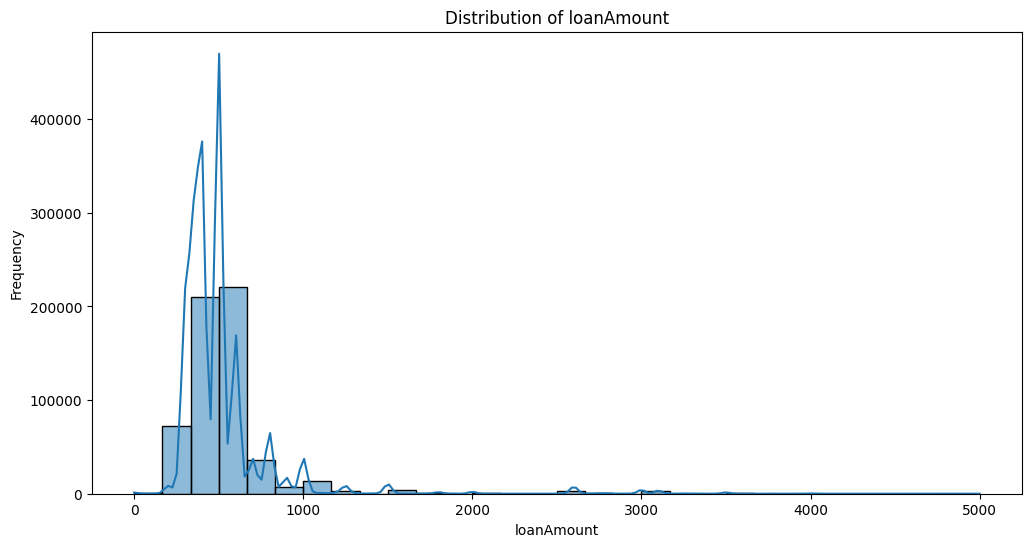

In [6]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'loanAmount')

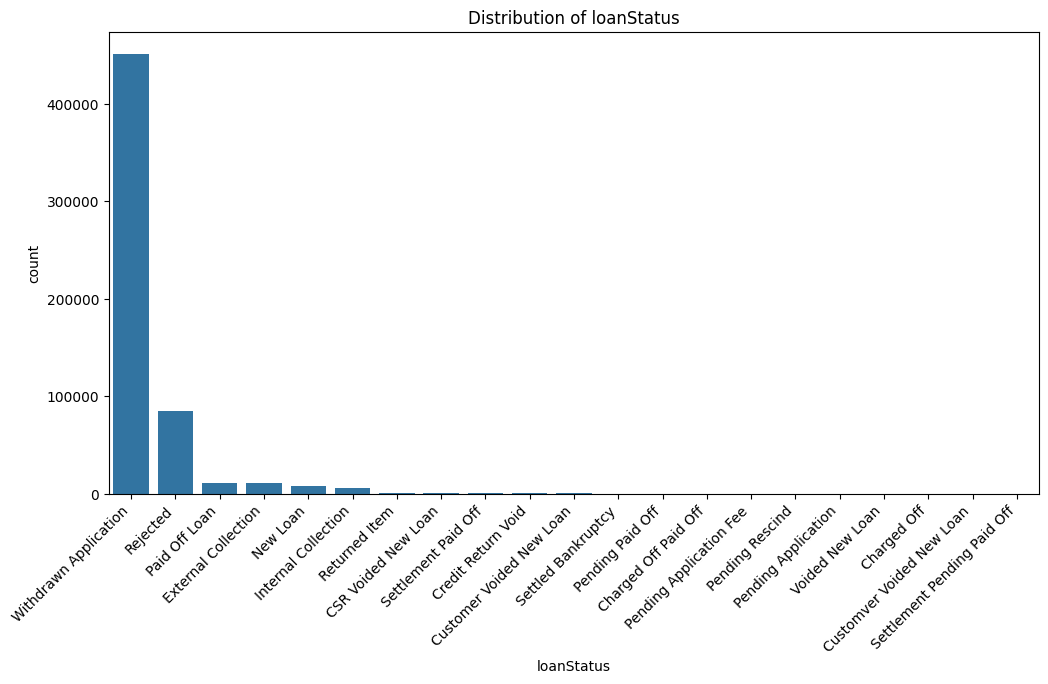

In [7]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'loanStatus')

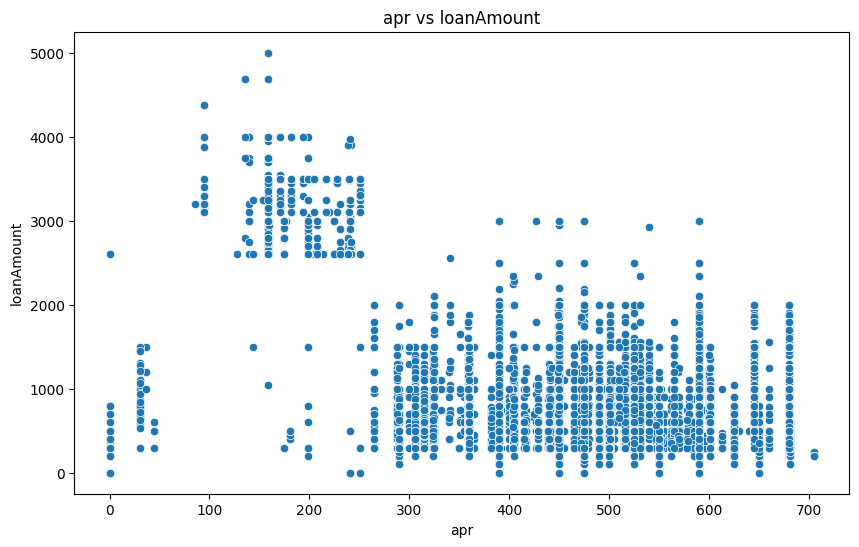

In [8]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'apr', 'loanAmount')


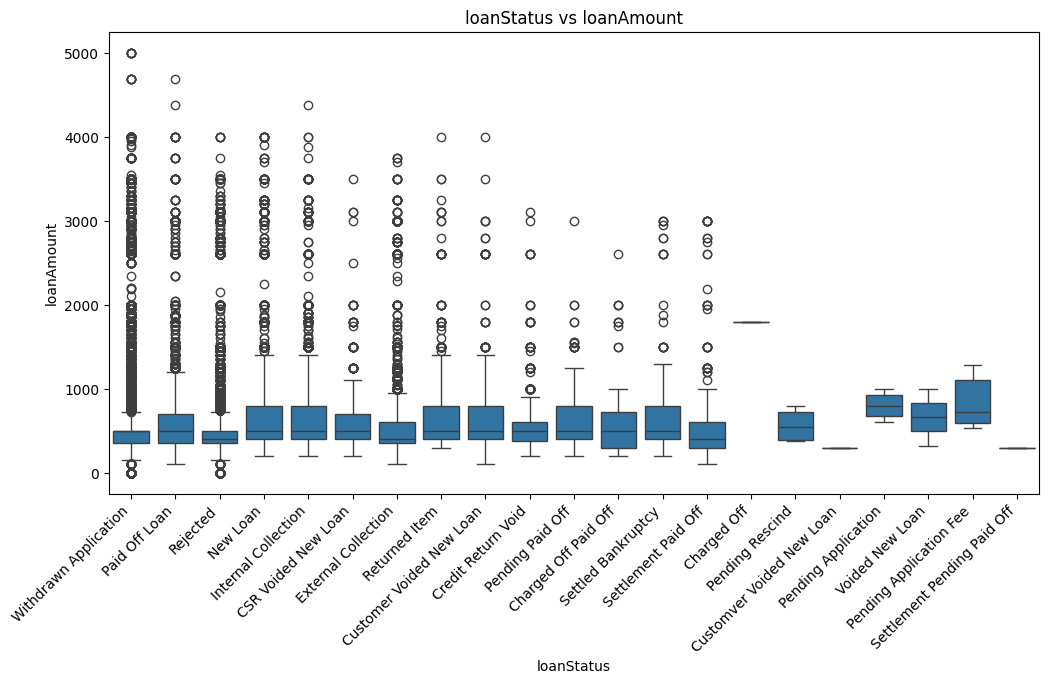

In [9]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'loanStatus', 'loanAmount')

# Insights from Univariate and Bivariate Analysis

## Step 3: Univariate Analysis

### 1. Loan Amount Distribution (Numerical Feature)
- **Insight**: The distribution of `loanAmount` is right-skewed, with the majority of loan amounts concentrated at the lower end. Most loans are relatively small, with a few significantly larger loan amounts.
- **Implication**: This suggests that smaller loans are more common, while large loans are rare. The skewness may require transformation (e.g., log transformation) to improve model performance.

### 2. Loan Status Distribution (Categorical Feature)
- **Insight**: The `loanStatus` feature reveals that certain statuses (e.g., "Paid Off Loan", "Rejected", and "Withdrawn Application") occur more frequently than others.
- **Implication**: This imbalance might impact predictive modeling, as some categories may dominate the dataset. Oversampling or undersampling techniques may be needed to balance the dataset.

## Step 4: Bivariate Analysis

### 1. APR vs. Loan Amount (Numerical vs. Numerical)
- **Insight**: There is no strong correlation between `apr` and `loanAmount`. While some higher loan amounts have lower APRs, the distribution is scattered.
- **Implication**: This suggests that APR is not strictly dependent on loan amount but may be influenced by other factors such as creditworthiness, loan term, or lender policies.

### 2. Loan Status vs. Loan Amount (Categorical vs. Numerical)
- **Insight**: Loan amounts vary across different loan statuses. "Paid Off Loan" tends to have higher loan amounts on average compared to "Rejected" or "Withdrawn Application".
- **Implication**: This indicates that higher loan amounts are more likely to be approved and paid off, whereas lower loan amounts may have higher rejection rates.

## Summary
- **Key Predictors**: Loan amount and APR are crucial factors influencing loan status.
- **Data Distribution**: Skewness in `loanAmount` and imbalance in `loanStatus` categories should be addressed.
- **Outliers**: High loan amounts with extreme APR values may require special handling.

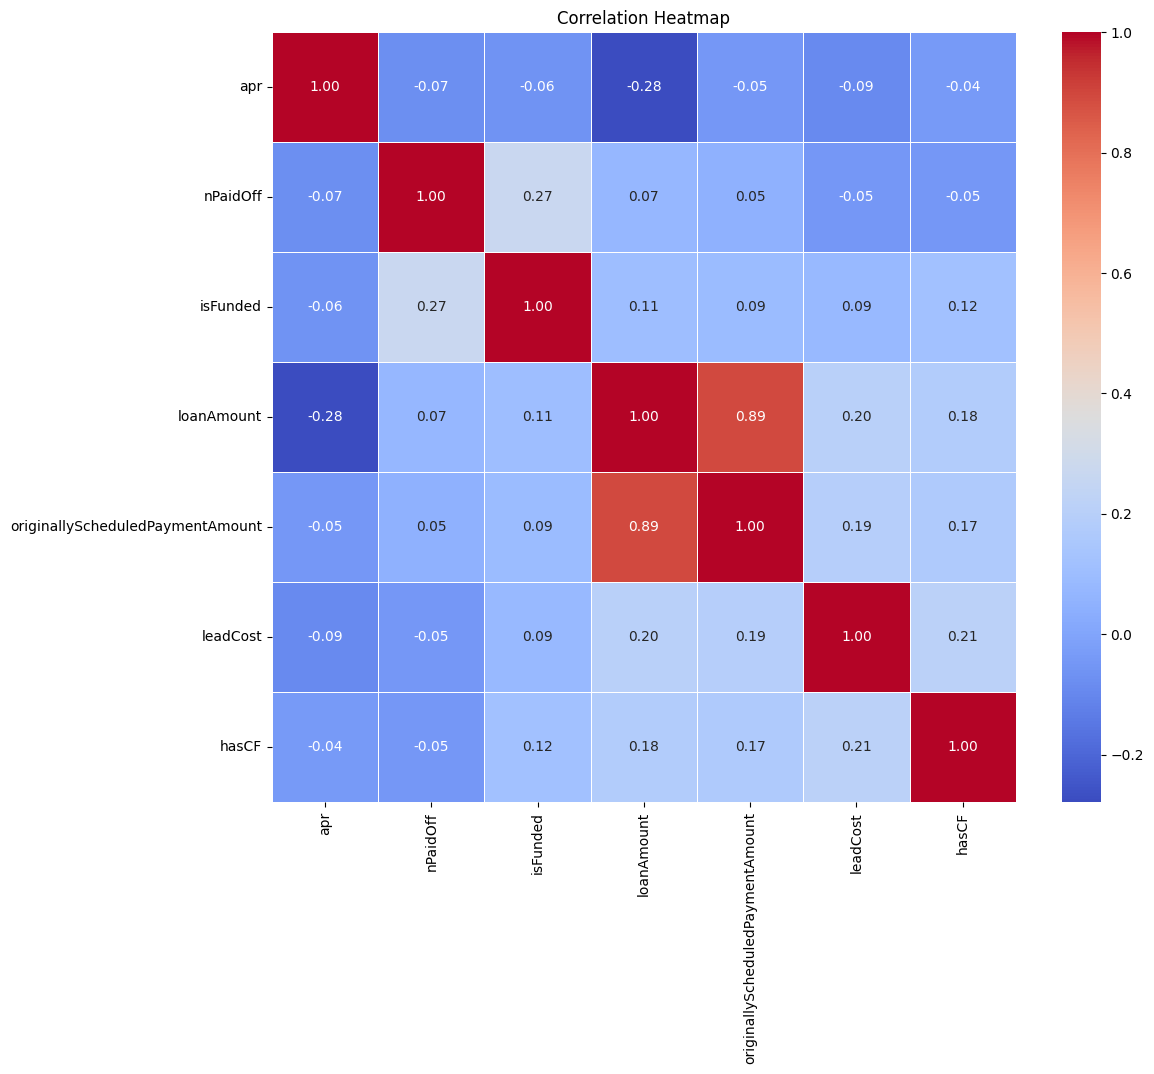

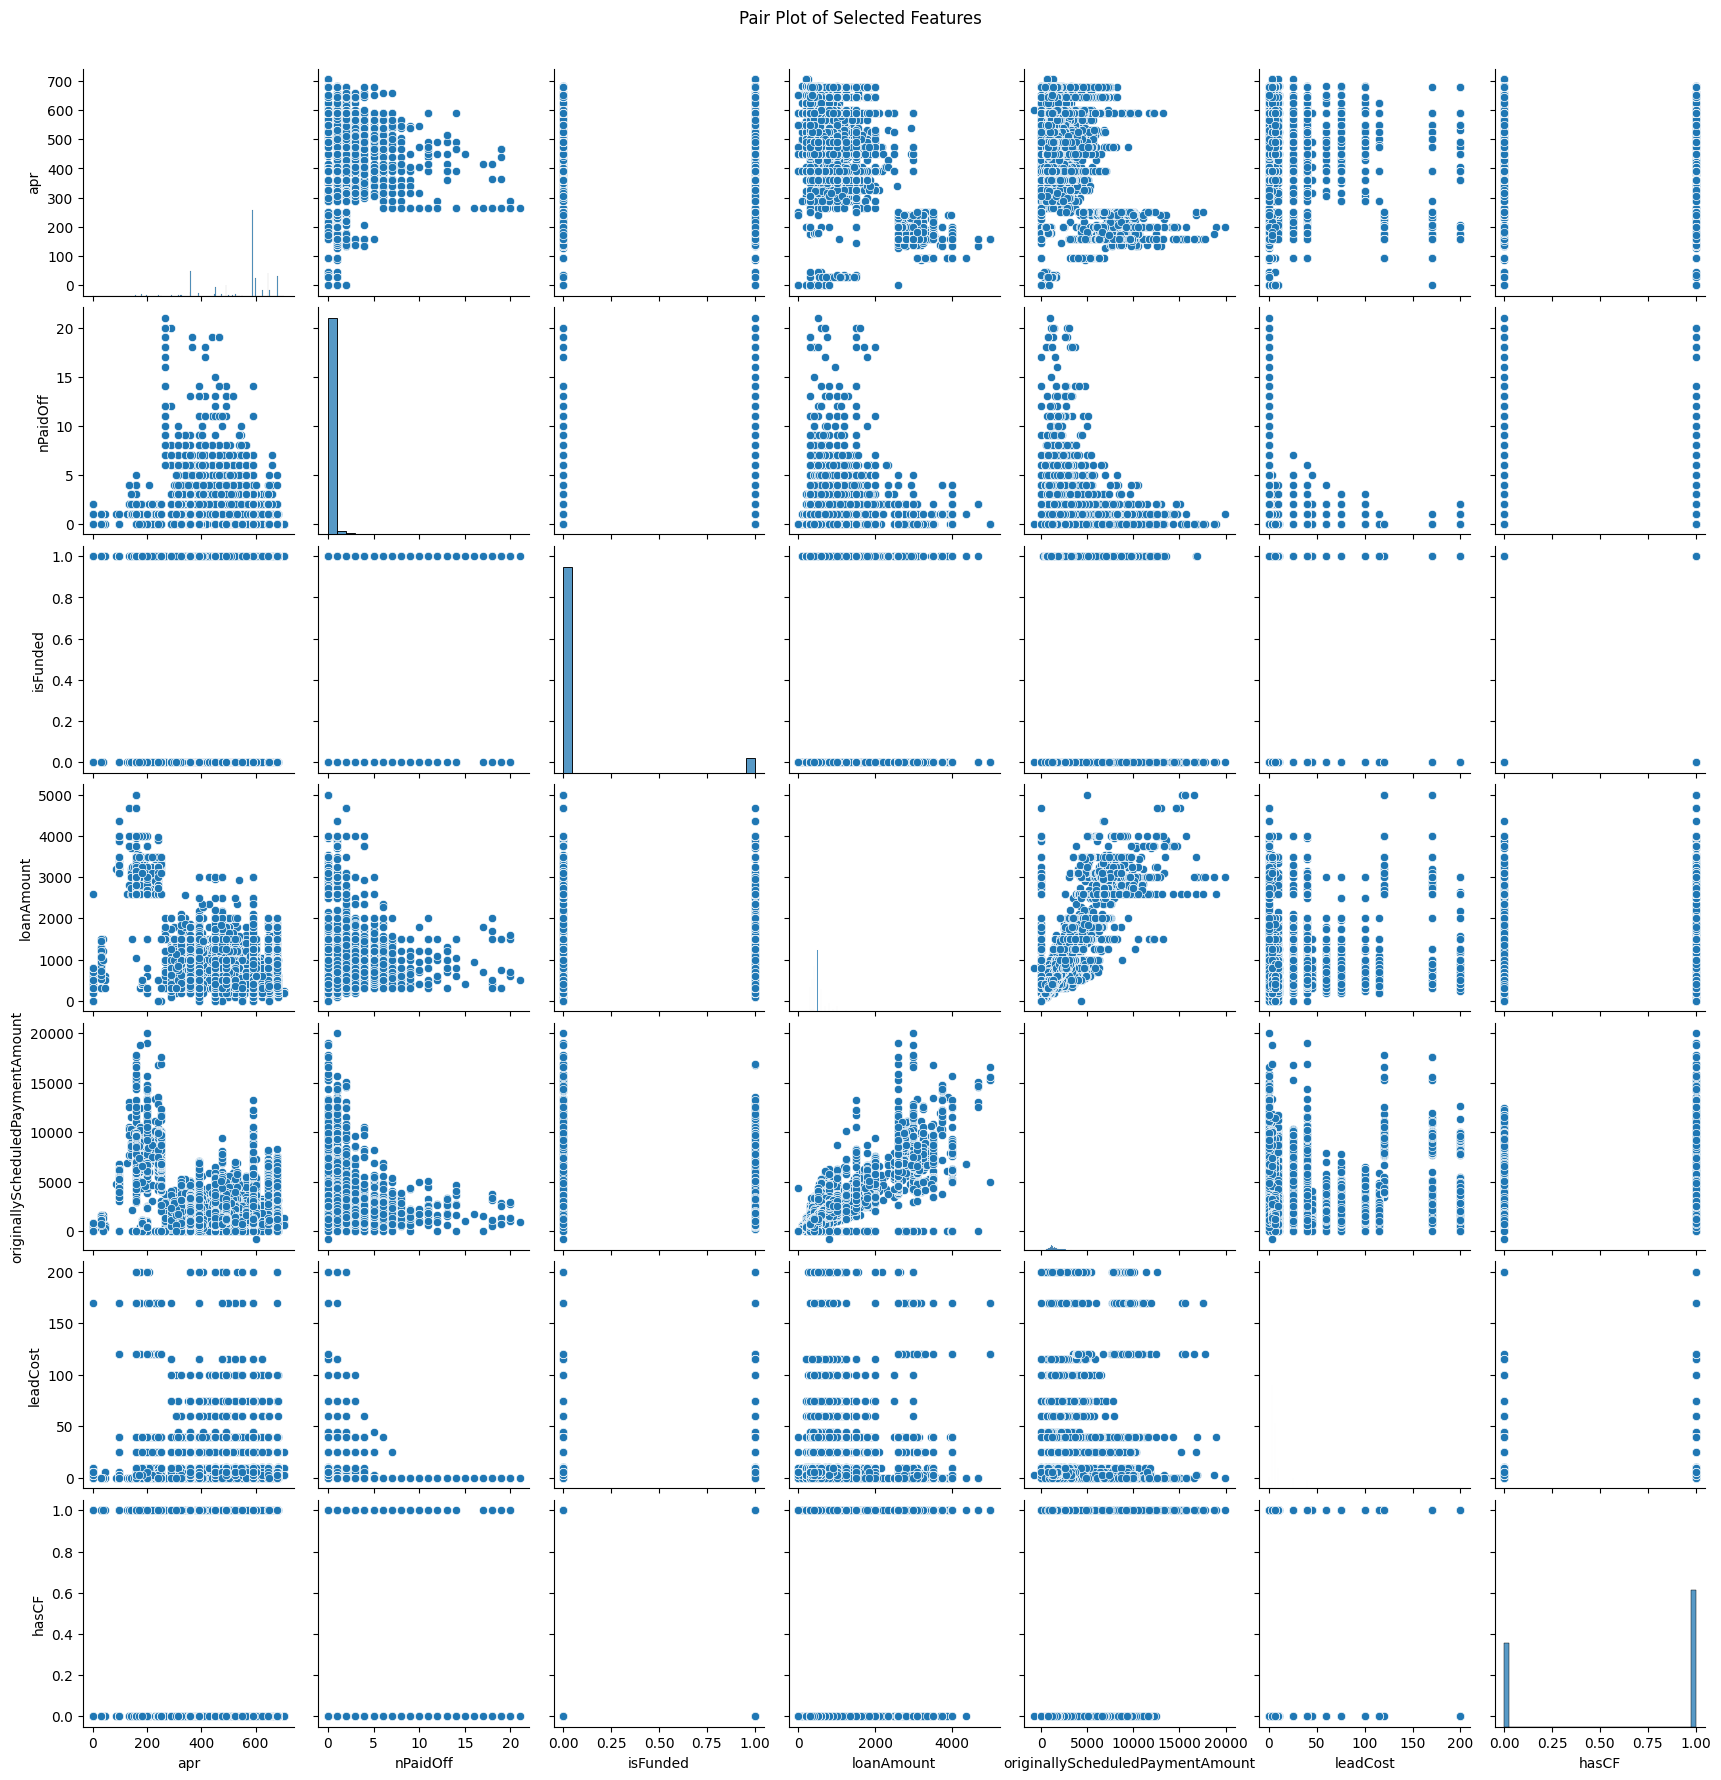

In [10]:

# Step 5: Multivariate Analysis
# ------------------------------
# Perform Multivariate Analysis

# Initialize the MultivariateAnalyzer with the SimpleMultivariateAnalysis strategy
multivariate_analyzer = SimpleMultivariateAnalysis()

# Select important features for the analysis
selected_features = df[['apr', 'nPaidOff', 'isFunded', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'hasCF']]

# Execute the multivariate analysis
multivariate_analyzer.analyze(selected_features)


# **Insights from Multivariate Analysis**

## **Correlation Heatmap**
### **1. Loan Amount and Originally Scheduled Payment Amount**
- **Insight**: A strong positive correlation (**0.89**) exists between `loanAmount` and `originallyScheduledPaymentAmount`. This suggests that as the loan amount increases, the scheduled payment amount also rises proportionally.
- **Implication**: This relationship is expected and indicates that the repayment structure is directly tied to the loan amount. It may not provide additional predictive power in a model without further transformations.

### **2. Loan Amount and Lead Cost**
- **Insight**: A moderate positive correlation (**0.20**) is observed between `loanAmount` and `leadCost`. This suggests that higher loan amounts tend to have slightly higher lead acquisition costs.
- **Implication**: This correlation, though weaker, might indicate a business pattern where costlier loans require more effort in acquisition or approval.

### **3. HasCF and Lead Cost**
- **Insight**: A weak positive correlation (**0.21**) exists between `hasCF` (possibly an indicator of cash flow) and `leadCost`. This suggests that having positive cash flow may slightly impact lead costs.
- **Implication**: While not a strong correlation, it may be relevant in certain segments of the dataset. Further segmentation or feature engineering could reveal a stronger relationship.

### **4. nPaidOff and isFunded**
- **Insight**: A moderate correlation (**0.27**) exists between `nPaidOff` and `isFunded`, indicating that loans that are funded tend to have a higher number of paid-off installments.
- **Implication**: This aligns with expectations—funded loans are naturally expected to have some level of repayment.

### **5. APR and Loan Amount**
- **Insight**: A negative correlation (**-0.28**) exists between `apr` (Annual Percentage Rate) and `loanAmount`. This suggests that higher loan amounts tend to have lower interest rates.
- **Implication**: This aligns with financial industry practices where larger loans may be offered at lower APRs due to lower perceived risk or better borrower profiles.

---

## **Pair Plot**
### **1. Loan Amount vs. Originally Scheduled Payment Amount**
- **Insight**: A clear linear relationship is observed, reinforcing the correlation heatmap's finding of a strong positive correlation.
- **Implication**: Since these two features are highly correlated, using both in a predictive model might introduce multicollinearity. Consider using one or deriving a new feature from them.

### **2. Discrete Nature of isFunded and hasCF**
- **Insight**: The features `isFunded` and `hasCF` appear to be binary (0 or 1), indicating categorical data.
- **Implication**: These variables should be treated as categorical during feature encoding to prevent inappropriate numerical interpretations in modeling.

### **3. Potential Outliers in APR and Loan Amount**
- **Insight**: Certain data points in the `apr` vs. `loanAmount` scatter plot appear to be extreme values.
- **Implication**: These may represent exceptional cases (e.g., very high-interest loans or small loans with unusually high APRs). Further investigation is needed to determine if they should be removed or treated differently in modeling.

### **4. Non-Linear Relationships**
- **Insight**: Some scatter plots show non-linear patterns, suggesting that relationships between certain variables might not be well captured by simple linear regression.
- **Implication**: Consider using polynomial transformations or non-linear models to capture these effects better.

---

## **Issues to Address**
### **1. Multicollinearity**
- **Issue**: The strong correlation between `loanAmount` and `originallyScheduledPaymentAmount` suggests potential multicollinearity.
- **Action**: Perform Variance Inflation Factor (VIF) analysis to determine if one of these features should be removed or transformed.

### **2. Feature Encoding**
- **Issue**: `isFunded` and `hasCF` are categorical but might be treated as continuous variables in certain models.
- **Action**: Ensure they are encoded appropriately as categorical (e.g., one-hot encoding or binary encoding).

### **3. Outliers in APR and Loan Amount**
- **Issue**: Extreme values in `apr` and `loanAmount` could unduly influence model performance.
- **Action**: Consider using robust statistical techniques to handle outliers, such as winsorization or removing extreme points based on domain knowledge.

### **4. Non-Linear Trends**
- **Issue**: Some feature relationships are non-linear.
- **Action**: Explore transformation techniques like log transformations, polynomial regression, or non-linear models to capture these patterns.

By addressing these issues, the predictive power and interpretability of the model can be significantly improved.
